In [41]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [42]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv', lineterminator = '\n')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No\r
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes\r


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [44]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [45]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn\r             0
dtype: int64

In [46]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [47]:
df.duplicated().sum()

0

In [48]:
df['customerID'].duplicated().sum()

0

Convert 0 and 1 values of SeniorCitizen column to yes/no to make it easier to understand

In [49]:
def convert(value):
    if value == 1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(convert)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No\r
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No\r
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes\r


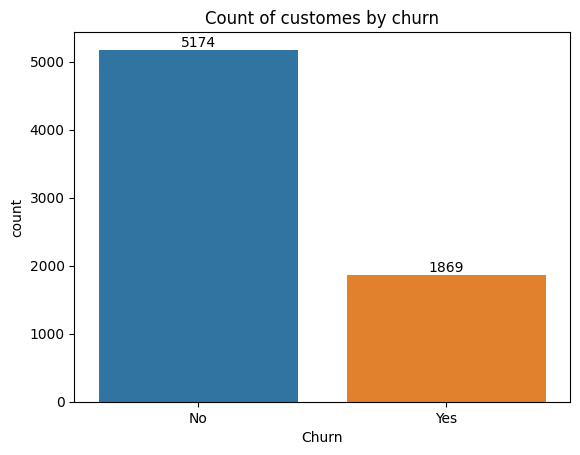

In [50]:
df.rename(columns={'Churn\r': 'Churn'}, inplace=True)
df['Churn'] = df['Churn'].str.replace(r'[\r\n\t]', '', regex=True)
plot = sns.countplot(x=df['Churn'], data = df)
plot.bar_label(plot.containers[0])
plt.title("Count of customes by churn")
plt.show()

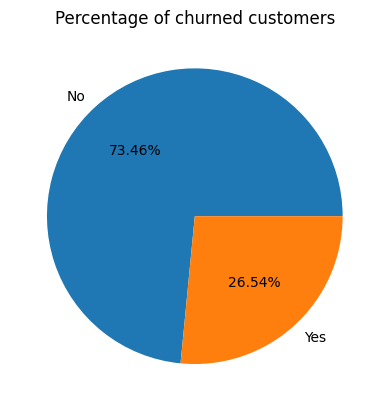

In [51]:
gb = df.groupby("Churn").agg({'Churn' : "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of churned customers")
plt.show()

From the given pie chart, we can conclude that 26.54% of our customers have churned out.
Let's figure out the reason behind it.

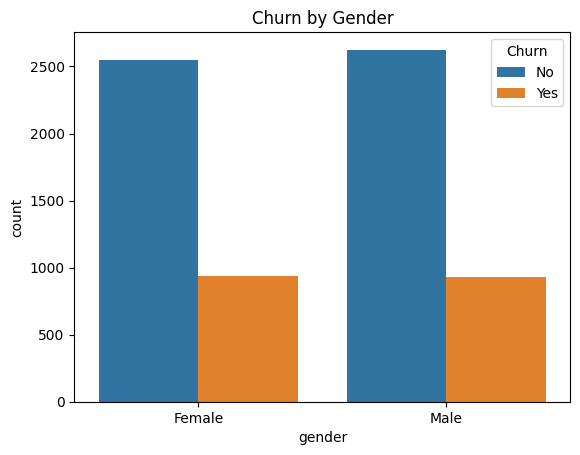

In [52]:
sns.countplot(x=df['gender'], data = df, hue = df['Churn'])
plt.title("Churn by Gender")
plt.show()

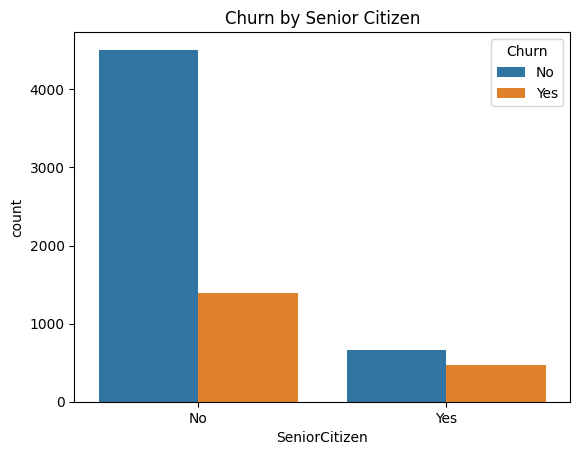

In [53]:
sns.countplot(x=df['SeniorCitizen'], data = df, hue = df['Churn'])
plt.title("Churn by Senior Citizen")
plt.show()

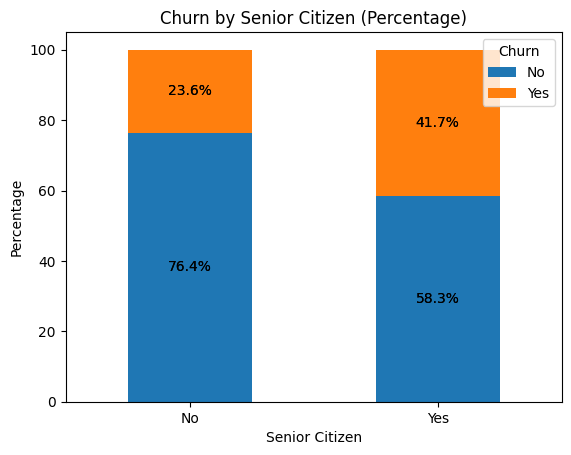

In [54]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100
fig, ax = plt.subplots()
total_counts.plot(kind ='bar', stacked = True, ax=ax)
for idx, row in cross_tab.iterrows():
    cumulative = 0
    for col in ax.patches:
        width, height = col.get_width(), col.get_height()
        x, y = col.get_xy()
        ax.text(x+width/2, y + height / 2, f'{height:.1f}%', ha='center', va='center')
        
plt.title("Churn by Senior Citizen (Percentage)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc="upper right")

plt.show()


Comparatively a greater percentage of people in senior citizen category have churned

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

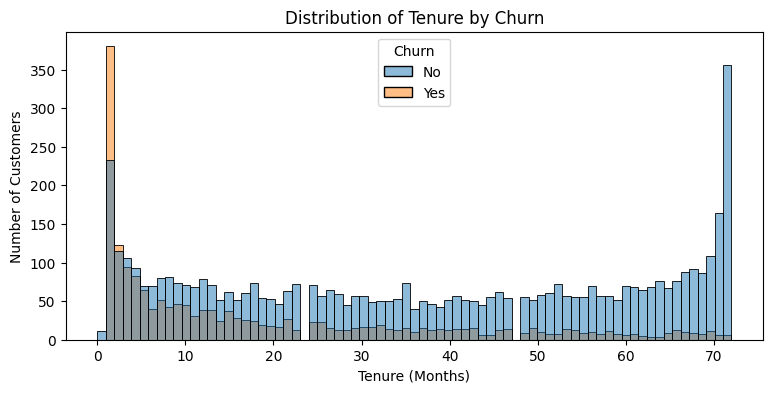

In [55]:
plt.figure(figsize=(9, 4))
sns.histplot(data=df, x="tenure", hue="Churn", bins=75, multiple="layer")
plt.title("Distribution of Tenure by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

People who have used our services for a long time have stayed and people who have used our services for 1 or months have churned

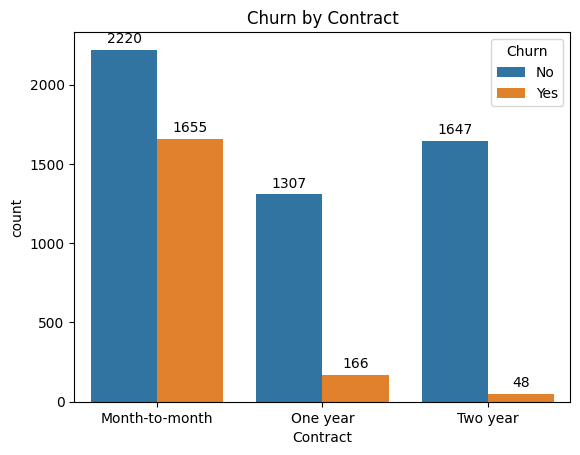

In [57]:
ax = sns.countplot(x=df['Contract'], data = df, hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Churn by Contract")
plt.show()

People who have month to month contract are likely to churn than those who have 1 or 2 years of contract

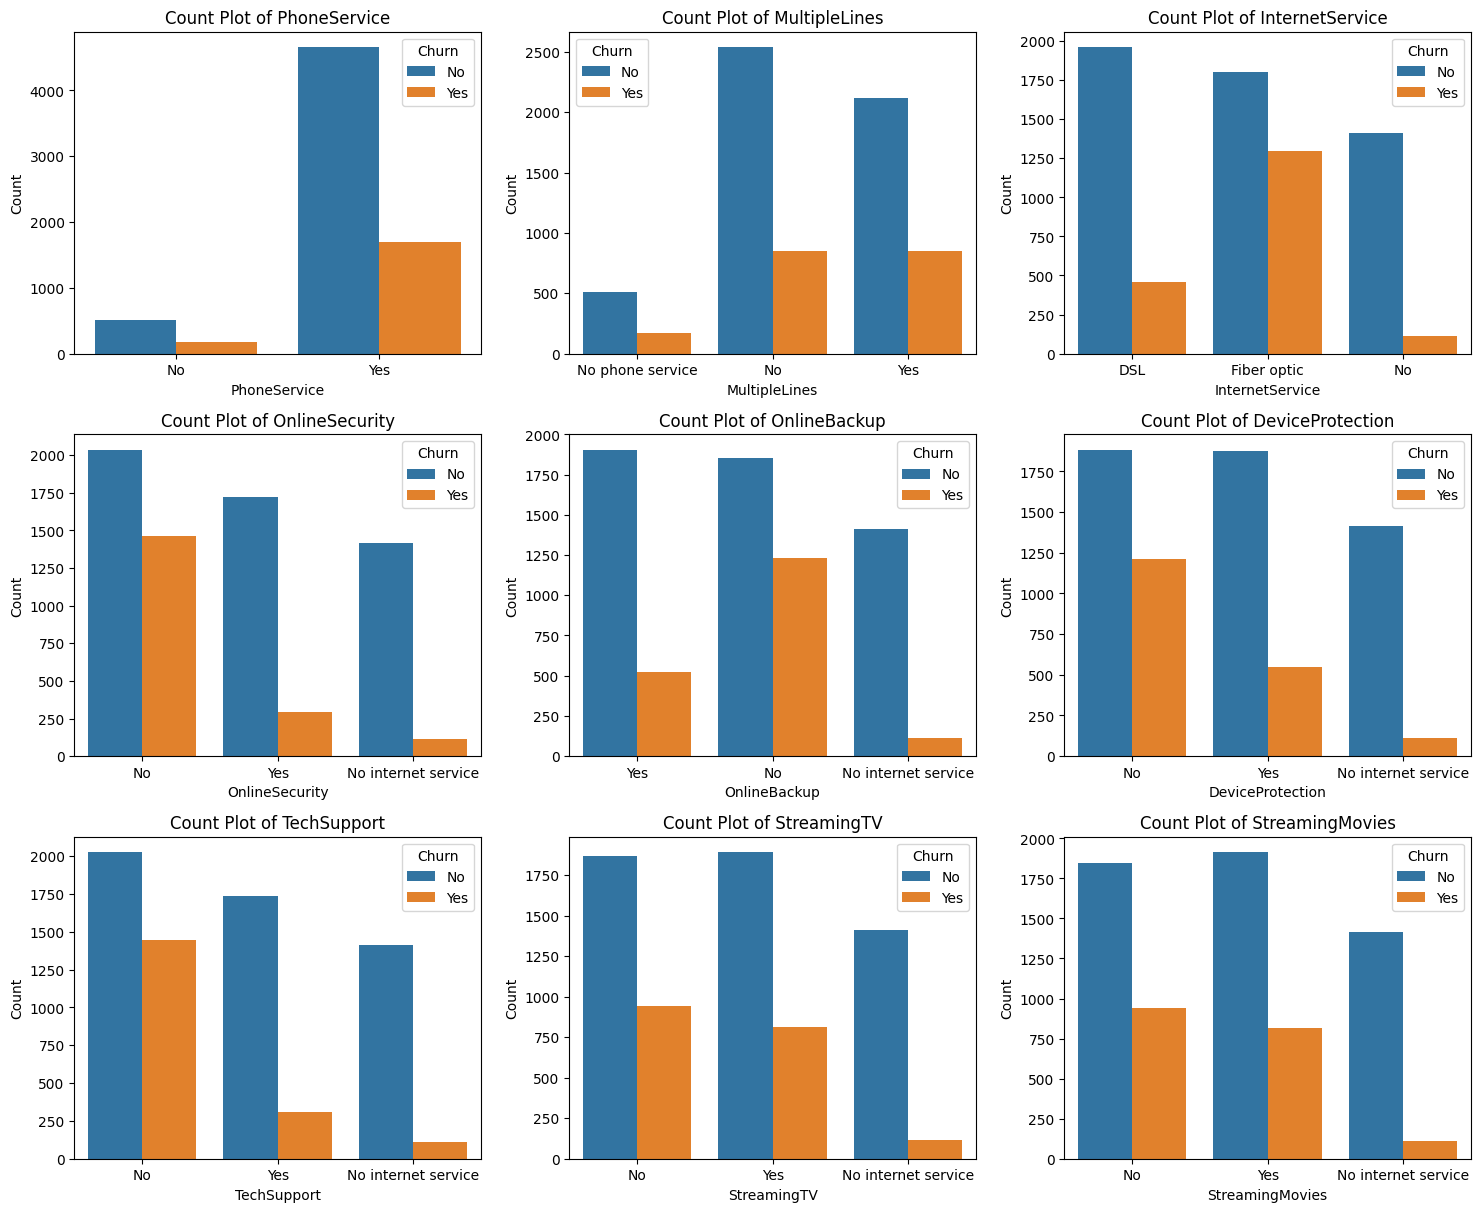

In [64]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
          'StreamingMovies']


n_cols = 3
n_rows = (len(columns) + n_cols - 1)
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 4))
axes=axes.flatten()

for i, col in enumerate(columns):
    sns.countplot(x = col, data = df, ax = axes[i], hue = df['Churn'])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services likee PhoneService, InternetService (particularly DSL) and OnlineSecurity enabled. For services like OnlineBackup, TechSupport and StreamingTV, churn rates are noticebaly high when these services are not used or are unavailable. 

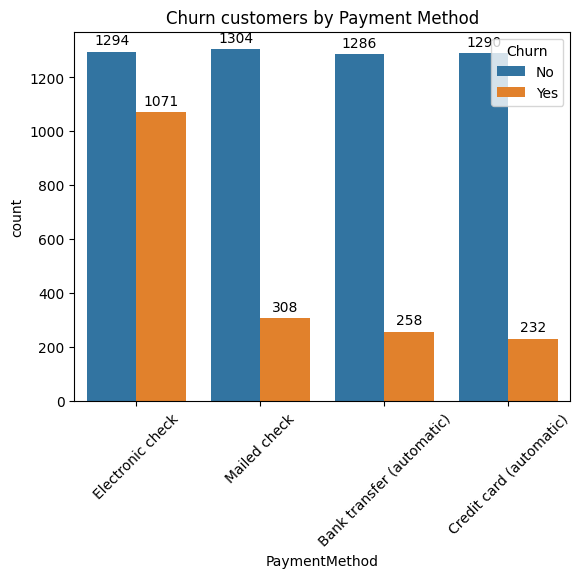

In [69]:
ax = sns.countplot(x=df['PaymentMethod'], data = df, hue = df['Churn'])
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)
plt.title("Churn customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

Customer is likely to churn when they choose electronic check as their payment method.